# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator
import tensorflow as tf
import glob
import os
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from stable_baselines3 import DQN, PPO

In [25]:
class A:
    
    def __init__(self):
        self.a = 1
    
    def train(self):
        kwargs = {'a': 3, 'b' : 2}
        return self.predict(**kwargs)
    
    def predict(self, a, **kwargs):
        return self.a + a

In [26]:
a = A()

In [27]:
a.train()

4

# Load Tensorboard Log

In [43]:
def load_tf(dirname, basedir):
    prefix = basedir
    dirname = prefix + dirname
    dirname = glob.glob(dirname + '/*')[0]
    
    ea = event_accumulator.EventAccumulator(dirname, size_guidance={event_accumulator.SCALARS: 0})
    ea.Reload()
    dframes = {}
    mnames = ea.Tags()['scalars']
    
    for n in mnames:
        dframes[n] = pd.DataFrame(ea.Scalars(n), columns=["wall_time", "epoch", n.replace('val/', '')])
        dframes[n].drop("wall_time", axis=1, inplace=True)
        dframes[n] = dframes[n].set_index("epoch")
    return pd.concat([v for k,v in dframes.items()], axis=1)

def load_tf_jobs(regex, basedir):
    prefix = basedir + "results/"
    job_dirs = glob.glob(prefix + regex)

    rows = []
    for job in job_dirs:
        job_name = os.path.basename(os.path.normpath(job))
        
        # this loads in all the hyperparams from another file,
        # do your own thing here instead
        options = load_json(job + '/opt.json')
        try:
            results = load_tf(job.replace(prefix, ''), basedir)
        except:
            continue

        for opt in options:
            results[opt] = options[opt]
        rows.append(results)

    for row in rows:
        row['epoch'] = row.index
        row.reset_index(drop=True, inplace=True)
    df = pd.concat(rows)
    return df

In [48]:
import os
run = "trial_3/"
basedir = "/Users/arthurvandenhoeke/Documents/EhB/courses/Robotics/Project/src/"
runs = os.listdir(basedir + run)
idx = np.sort([[int(n) for n in e if n.isdigit()][0] for e in list(map(lambda x: x.split('_'), runs))])

In [49]:
runs

['run_2', 'run_3', 'run_1']

In [50]:
res = pd.concat([load_tf(dirname="run_" + str(i), basedir=basedir+run) for i in idx])
res = res.reset_index(drop=True)
res.index = np.asarray(list(res.index))*8

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


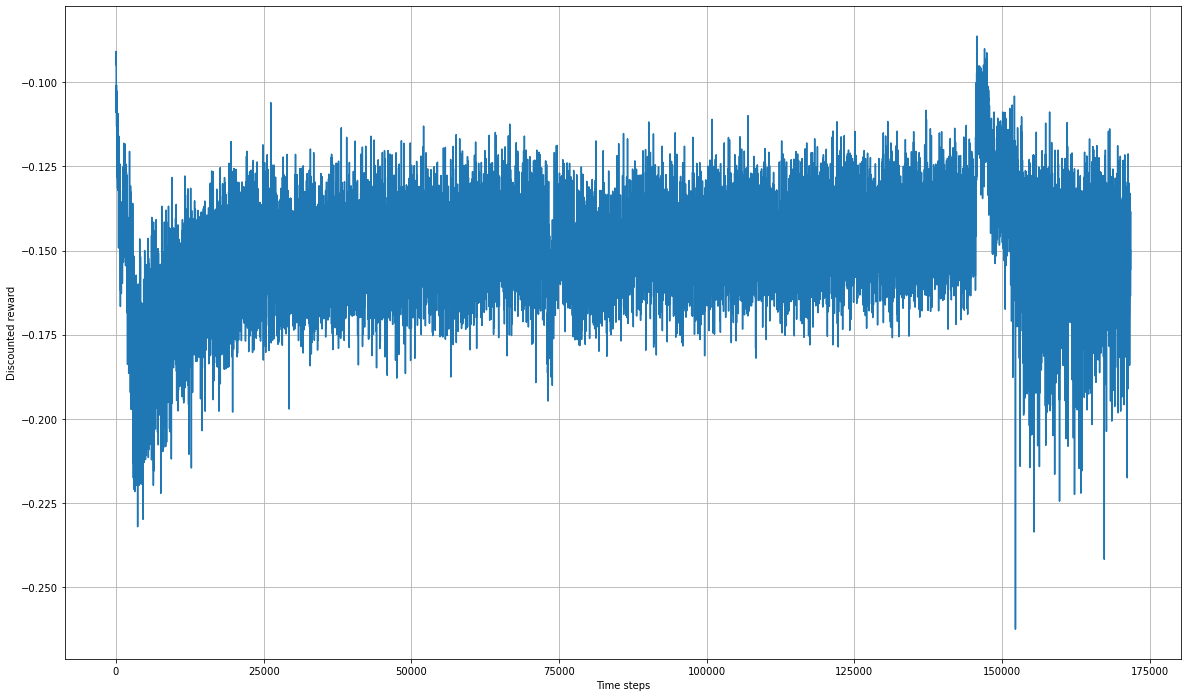

In [51]:
plt.figure(figsize=(20,12))
#plt.plot(res["input_info/discounted_rewards"])
plt.plot(res["input_info/rewards"])
plt.xlabel("Time steps")
plt.ylabel("Discounted reward")
plt.grid(True)
plt.show()

# Plot reward distribution

In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [28]:
def gaussian(x: float, y: float) -> float:
    return np.exp(-(x**2 + y**2))

In [29]:
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1-np.exp(R)

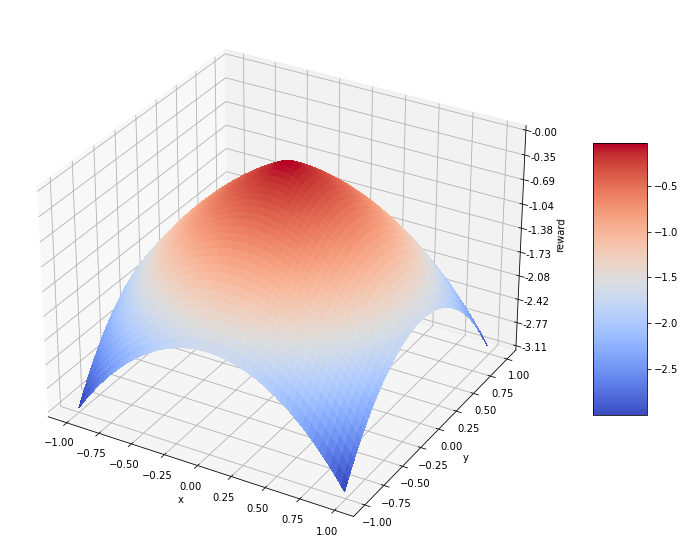

In [33]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Set axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('reward')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()